# PROJECT TITLE 

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [269]:
import pandas as pd 
from IPython.display import Markdown, display
import itertools
import numpy as np
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels
import statsmodels.api as sm

import pickle


In [270]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [271]:
display(Markdown("column_names.md"))

column_names.md

In [272]:
df = df.drop(columns=['id', 'date', 'waterfront','view', 'grade', 'lat', 'condition','zipcode','long'])
df 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,NaN,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1530,0.0,2009,0.0,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,2310,0.0,2014,0.0,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,1020,0.0,2009,0.0,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,1600,0.0,2004,0.0,1410,1287


## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   sqft_above     21597 non-null  int64  
 7   sqft_basement  21597 non-null  object 
 8   yr_built       21597 non-null  int64  
 9   yr_renovated   17755 non-null  float64
 10  sqft_living15  21597 non-null  int64  
 11  sqft_lot15     21597 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 2.0+ MB


In [274]:
df.drop(columns='price')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,1340,5650
1,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,1690,7639
2,2,1.00,770,10000,1.0,770,0.0,1933,NaN,2720,8062
3,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,1360,5000
4,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,1530,0.0,2009,0.0,1530,1509
21593,4,2.50,2310,5813,2.0,2310,0.0,2014,0.0,1830,7200
21594,2,0.75,1020,1350,2.0,1020,0.0,2009,0.0,1020,2007
21595,3,2.50,1600,2388,2.0,1600,0.0,2004,0.0,1410,1287


In [275]:
df = df.dropna()

In [276]:
df = df.drop(df[df['sqft_basement'].str.contains(r'[?]')].index)

In [277]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,1690,7639
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,3890,1530.0,2001,0.0,4760,101930


In [278]:
X = df.drop(columns='price')
y = df['price']

We learned the astype(float) approach below from https://stackoverflow.com/questions/33833832/building-multi-regression-model-throws-error-pandas-data-cast-to-numpy-dtype-o 



In [279]:
tv_model = sm.OLS(y.astype(float), X.astype(float)).fit()
tv_model_summ = tv_model.summary()

In [280]:
tv_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              9820.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):                        0.00
Time:                        10:29:36   Log-Likelihood:                     -2.4109e+05
No. Observations:               17389   AIC:                                  4.822e+05
Df Residuals:                   17379   BIC:                                  4.823e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       -5.34e+04   2578.870    -20.705      0.000   -5.85e+04   -4.83e+04
bathrooms      1733.0692   4236.041      0.409      0.682   -6569.998       1e+04
sqft_living     188.4859      2.925     64.435      0.000     182.752     194.220
sqft_lot          0.0253      0.066      0.386      0.700      -0.103       0.154
floors         1.789e+04   4836.319      3.700      0.000    8414.906    2.74e+04
sqft_above       71.9815      2.940     24.487      0.000      66.220      77.743
sqft_basement   116.5043      3.467     33.607      0.000     109.709     123.299
yr_built        -10.1734      4.969     -2.047      0.041     -19.914      -0.433
yr_renovated     85.3564      4.859     17.567      0.000      75.833      94.880
sqft_living15    78.6457      4.472     17.586      0.000      69.880      87.411
sqft_lot15       -0.7953      0.102     -7.832      0.000      -0.994      -0.596
==============================================================================
Omnibus:                    12521.934   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           574884.936
Skew:                           2.959   Prob(JB):                         0.00
Kurtosis:                      30.539   Cond. No.                     6.36e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.14e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [281]:
df = df.loc[df['floors']>1]
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,1690,7639
9,323000.0,3,2.50,1890,6560,2.0,1890,0.0,2003,0.0,2390,7570
14,530000.0,5,2.00,1810,4850,1.5,1810,0.0,1900,0.0,1360,4850
15,650000.0,4,3.00,2950,5000,2.0,1980,970.0,1979,0.0,2140,4000
16,395000.0,3,2.00,1890,14040,2.0,1890,0.0,1994,0.0,1890,14018
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1530,0.0,2009,0.0,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,2310,0.0,2014,0.0,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,1020,0.0,2009,0.0,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,1600,0.0,2004,0.0,1410,1287


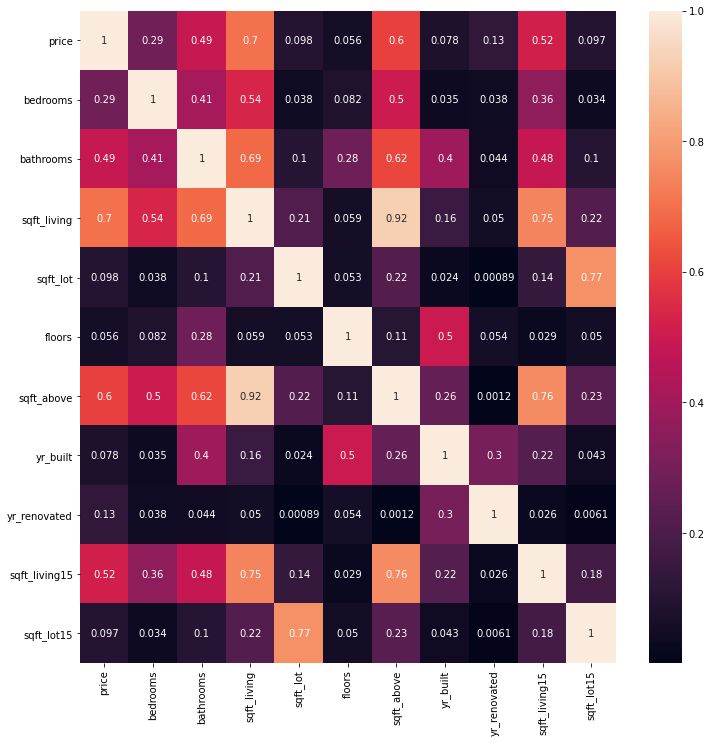

In [283]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?